In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


In [46]:
searches =  pd.read_json("searches.json",orient='records', lines=True)

In [47]:
print(searches)

          uid  is_instructor  login_count  search_count
0     6061521           True            1             2
1    11986457          False            4             0
2    15995765          False            1             0
3     9106912           True            3             0
4     9882383          False            1             0
..        ...            ...          ...           ...
676  16768212          False            2             0
677   7643715           True            1             0
678  14838641          False            1             0
679   6454817          False            2             0
680   9276990          False            2             3

[681 rows x 4 columns]


In [48]:
new = searches.loc[(searches['uid']%2 == 1)]
original = searches.loc[(searches['uid']%2 == 0)]

In [49]:
new_one_search = new[new["search_count"] > 0]
new_no_search = new[new["search_count"] == 0]
original_one_search = original[original["search_count"] > 0]
original_no_search = original[original["search_count"] == 0]

contingency = [[original_one_search.shape[0],original_no_search.shape[0]],
              [new_one_search.shape[0],new_no_search.shape[0]]]
print(contingency)

[[111, 222], [98, 250]]


In [50]:
chi2, p , dof, exp = stats.chi2_contingency(contingency)
print(p)
print("there might be no relationship")

0.1676297094499566


In [51]:
teacher_new = searches.loc[(searches['uid']%2 == 1)&(searches['is_instructor']==True)]
teacher_original = searches.loc[(searches['uid']%2 == 0)&(searches['is_instructor']==True)]

In [52]:
teacher_new_one_search = teacher_new[teacher_new["search_count"] > 0]
teacher_new_no_search = teacher_new[teacher_new["search_count"] == 0]
teacher_original_one_search = teacher_original[teacher_original["search_count"] > 0]
teacher_original_no_search = teacher_original[teacher_original["search_count"] == 0]

contingency = [[teacher_original_one_search.shape[0],teacher_original_no_search.shape[0]],
              [teacher_new_one_search.shape[0],teacher_new_no_search.shape[0]]]
print(contingency)

[[50, 70], [33, 82]]


In [53]:
chi2, T_p , dof, exp = stats.chi2_contingency(contingency)
print(T_p)
print("there might be some relationship")

0.052001632770999166


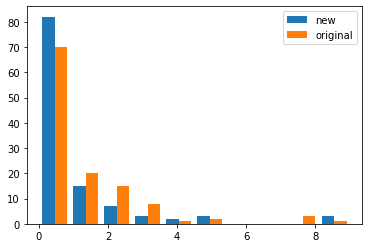

In [28]:

plt.figure()
plt.hist((new["search_count"],original["search_count"]),label = ['new','original'])
plt.legend(loc='upper right')
plt.show()


In [29]:
print(new)
print(original)

          uid  is_instructor  login_count  search_count
0     6061521           True            1             2
7    11760157           True            1             0
13   12986377           True           14             0
14    9792541           True            1             0
19   14915463           True            7             0
..        ...            ...          ...           ...
637   3013413           True            5             0
640  16619457           True            1             0
668   8698521           True            3             0
671   6954951           True            2             0
677   7643715           True            1             0

[115 rows x 4 columns]
          uid  is_instructor  login_count  search_count
3     9106912           True            3             0
21    3378724           True            1             0
26    8905420           True            4             0
33   13479688           True            3             0
34   13982326           

In [56]:
##U-test
u_test = stats.mannwhitneyu(new["search_count"],original["search_count"])
print(u_test.pvalue)

0.07059103623543486


In [57]:
Teacher_u_test = stats.mannwhitneyu(teacher_new["search_count"],teacher_original["search_count"])
print(Teacher_u_test.pvalue)
print("null h can be rejected with p<0.05")

0.022479717008052572
